# Prédiction du Secteur le plus rentable au Maroc 

**Ingénierie des Caractéristiques  ET  Modélisation des Données**

In [2]:
from sklearn.preprocessing import StandardScaler
# Identify all columns except the two that are not economic indicators
indicators = df.columns.difference(['Secteur', 'Année'])
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric features
scaled_features = scaler.fit_transform(df[indicators])

# Create a new dataframe with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=indicators)

# Display the head of the scaled dataframe
scaled_df.head()

,Capitalisation boursière,Consommation Finale,Consommation intermédiaire,Excédent brut d'exploitation,Exportations,Importations,Impôts sur les produits,PIB,Production nationale,Salaires bruts,Volume des échanges
0,-0.468998,-0.036292,-0.362055,0.737378,-0.365721,-0.374285,-0.559991,0.176858,-0.237281,-0.573773,-0.479425
1,-0.343486,-0.038175,-0.343389,0.654369,-0.385330,-0.371013,-0.623067,0.070171,-0.242582,-0.558011,-0.476625
2,-0.278522,-0.028717,-0.320577,1.001950,-0.375974,-0.399955,-0.650733,0.293800,-0.143905,-0.518925,-0.454738
3,-0.307379,0.001715,-0.318346,0.702108,-0.364796,-0.362948,-0.657867,0.259691,-0.209287,-0.507116,-0.465553
4,-0.359975,0.029911,-0.288661,1.070470,-0.330353,-0.390611,-0.664653,0.425610,-0.100630,-0.453146,-0.473303


In [3]:
# Compute the composite profitability metric by using a simple average of the standardized indicators
df['composite_profitability'] = scaled_df.mean(axis=1)
df.head()

,Secteur,Année,Capitalisation boursière,Consommation Finale,Consommation intermédiaire,Excédent brut d'exploitation,Exportations,Importations,Impôts sur les produits,PIB,Production nationale,Salaires bruts,Volume des échanges,composite_profitability
0,Agriculture,2011,20253.0,68921.31431,57002,95308,13318.75732,16005.18334,5263,111530.6959,164596,11313.0,1425.0,-0.231235
1,Agriculture,2012,24546.0,68769.74634,59077,91773,12210.29424,16382.96412,3813,102790.1822,163617,11636.0,2383.3,-0.241558
2,Agriculture,2013,26768.0,69531.01265,61613,106575,12739.18513,13040.99090,3177,121111.2982,181841,12437.0,9872.2,-0.170572
3,Agriculture,2014,25781.0,71980.46408,61861,93806,13371.04799,17314.30029,3013,118316.9180,169766,12679.0,6171.6,-0.202707
4,Agriculture,2015,23982.0,74250.00000,65161,109493,15318.00682,14119.95994,2857,131910.0000,189833,13785.0,3520.0,-0.139576


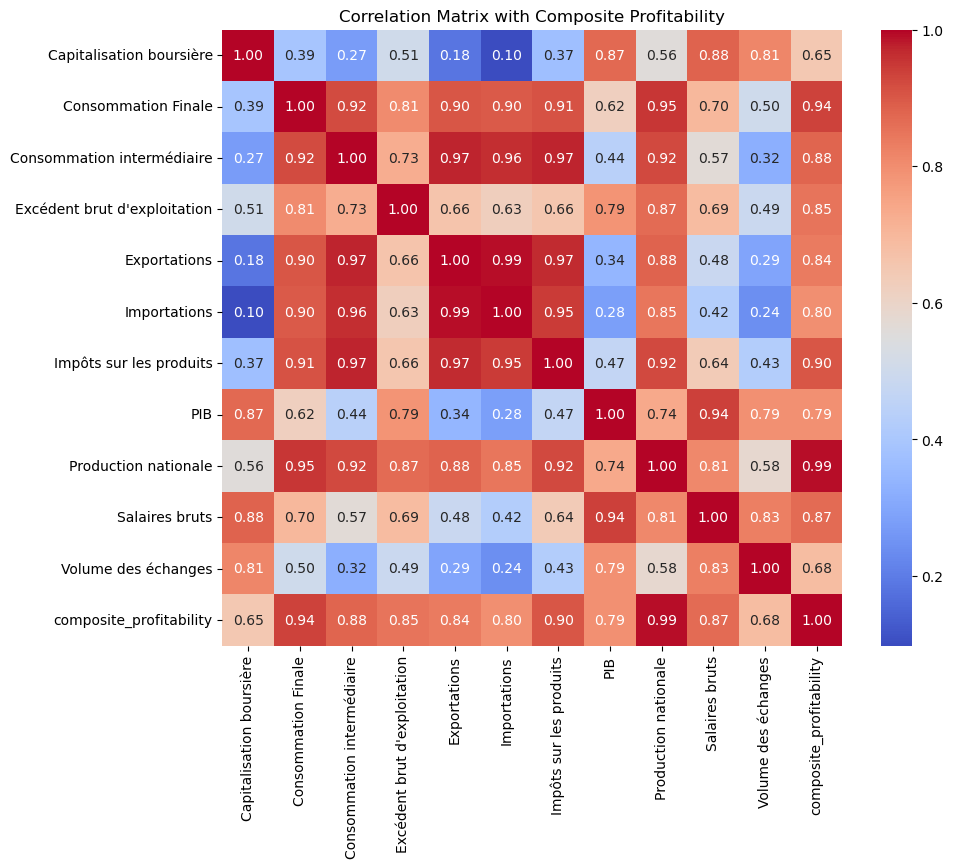

Correlations with composite_profitability:
composite_profitability         1.000000
Production nationale            0.989436
Consommation Finale             0.936535
Impôts sur les produits         0.901562
Consommation intermédiaire      0.880050
Salaires bruts                  0.867112
Excédent brut d'exploitation    0.850848
Exportations                    0.836402
Importations                    0.796430
PIB                             0.792600
Volume des échanges             0.684730
Capitalisation boursière        0.647764
Name: composite_profitability, dtype: float64


In [4]:
indicators = df.columns.difference(['Secteur', 'Année'])
# Calculate the correlation matrix
corr_matrix = df[indicators].corr()

# Select the correlations of 'composite_profitability' with other variables
profitability_correlations = corr_matrix['composite_profitability'].sort_values(ascending=False)

# Plot the correlations with 'composite_profitability'
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with Composite Profitability')
plt.show()

# Output the correlations
print('Correlations with composite_profitability:')
print(profitability_correlations)

In [5]:
# Set a new threshold for selecting highly correlated features
threshold = 0.7

# Select features that have a correlation above the new threshold with 'composite_profitability'
# Avoiding the first entry since it's 'composite_profitability' itself
selected_features = profitability_correlations[profitability_correlations > threshold].index[1:].tolist()

# Remove features that have a correlation less than the new threshold
features_to_remove = profitability_correlations[profitability_correlations <= threshold].index.tolist()
df_reduced = df.drop(columns=features_to_remove)

# Output the remaining features after removal
print('Features selected for modeling after applying the threshold of', threshold, ':')
for i in selected_features:
    print(i)

Features selected for modeling after applying the threshold of 0.7 :
Production nationale
Consommation Finale
Impôts sur les produits
Consommation intermédiaire
Salaires bruts
Excédent brut d'exploitation
Exportations
Importations
PIB


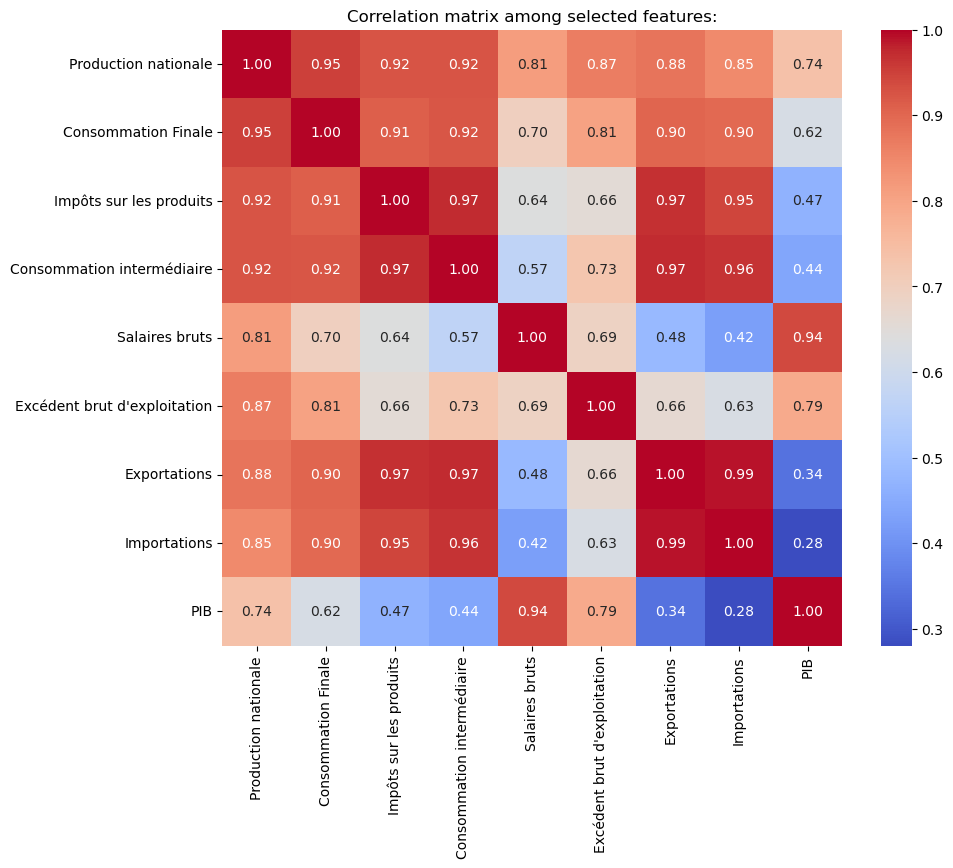

Pairs of features with high correlation (above 0.9 ):
Importations                Exportations                  0.990482
Impôts sur les produits     Consommation intermédiaire    0.973588
Consommation intermédiaire  Exportations                  0.972105
Exportations                Impôts sur les produits       0.967685
Importations                Consommation intermédiaire    0.964762
Production nationale        Consommation Finale           0.950843
Importations                Impôts sur les produits       0.945816
Salaires bruts              PIB                           0.939772
Production nationale        Impôts sur les produits       0.924773
Consommation intermédiaire  Production nationale          0.924614
Consommation Finale         Consommation intermédiaire    0.921712
Impôts sur les produits     Consommation Finale           0.910452
Exportations                Consommation Finale           0.902503
dtype: float64


In [6]:
# Check for multicollinearity among the remaining features
selected_features_correlation_matrix = df_reduced[selected_features].corr()

# Output the correlation matrix among the remaining features
plt.figure(figsize=(10, 8))
sns.heatmap(selected_features_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix among selected features:')
plt.show()

# Define a high correlation threshold for multicollinearity, typically a value above 0.7 might indicate strong multicollinearity
high_corr_threshold = 0.9

# Find pairs of features where the correlation coefficient exceeds the high correlation threshold
highly_correlated_pairs = selected_features_correlation_matrix.abs().unstack()
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1] # Remove self-correlation
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs > high_corr_threshold]
highly_correlated_pairs = highly_correlated_pairs.sort_values(ascending=False)

# Output the pairs of features with high correlation
print('Pairs of features with high correlation (above', high_corr_threshold, '):')
print(highly_correlated_pairs.drop_duplicates())

In [7]:
# Remove one feature from each highly correlated pair to reduce multicollinearity
# Based on the previous output, and the Correlations with composite_profitability we will remove 'Importations' and 'Consommation intermédiaire'
features_to_remove_due_to_multicollinearity = ['Importations', 'Consommation intermédiaire']

# Drop these features from the dataset
reduced_df = df_reduced.drop(columns=features_to_remove_due_to_multicollinearity)

# Output the head of the new reduced dataset
print('Reduced dataset with multicollinear features removed:')
reduced_df.head()

Reduced dataset with multicollinear features removed:


,Secteur,Année,Consommation Finale,Excédent brut d'exploitation,Exportations,Impôts sur les produits,PIB,Production nationale,Salaires bruts,composite_profitability
0,Agriculture,2011,68921.31431,95308,13318.75732,5263,111530.6959,164596,11313.0,-0.231235
1,Agriculture,2012,68769.74634,91773,12210.29424,3813,102790.1822,163617,11636.0,-0.241558
2,Agriculture,2013,69531.01265,106575,12739.18513,3177,121111.2982,181841,12437.0,-0.170572
3,Agriculture,2014,71980.46408,93806,13371.04799,3013,118316.9180,169766,12679.0,-0.202707
4,Agriculture,2015,74250.00000,109493,15318.00682,2857,131910.0000,189833,13785.0,-0.139576


In [8]:
df = pd.read_csv(r'C:\Users\User\Desktop\Reduced_df.csv')

In [9]:
# Define the features and target variable
X = df.drop(['composite_profitability', 'Secteur', 'Année'], axis=1)
y = df['composite_profitability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shape of the training and testing sets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

Training set: (44, 7) (44,)
Testing set: (12, 7) (12,)


In [10]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_linear = linear_model.predict(X_test)

# Calculate metrics
r2_linear = r2_score(y_test, y_pred_linear)

# Output the metrics
print('Linear Regression R^2:', r2_linear)

Linear Regression R^2: 0.9929266815160492


In [11]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
r2_rf = r2_score(y_test, y_pred_rf)

# Output the metrics
print('Random Forest Regressor R^2:', r2_rf)

Random Forest Regressor R^2: 0.9984738630433103


In [12]:
# Initialize the Support Vector Regressor model
svr_model = SVR()

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_svr = svr_model.predict(X_test)

# Calculate metrics
r2_svr = r2_score(y_test, y_pred_svr)

# Output the metrics
print('Support Vector Regressor R^2:', r2_svr)

Support Vector Regressor R^2: 0.9859817607259723


Feature importances from the RandomForest model:


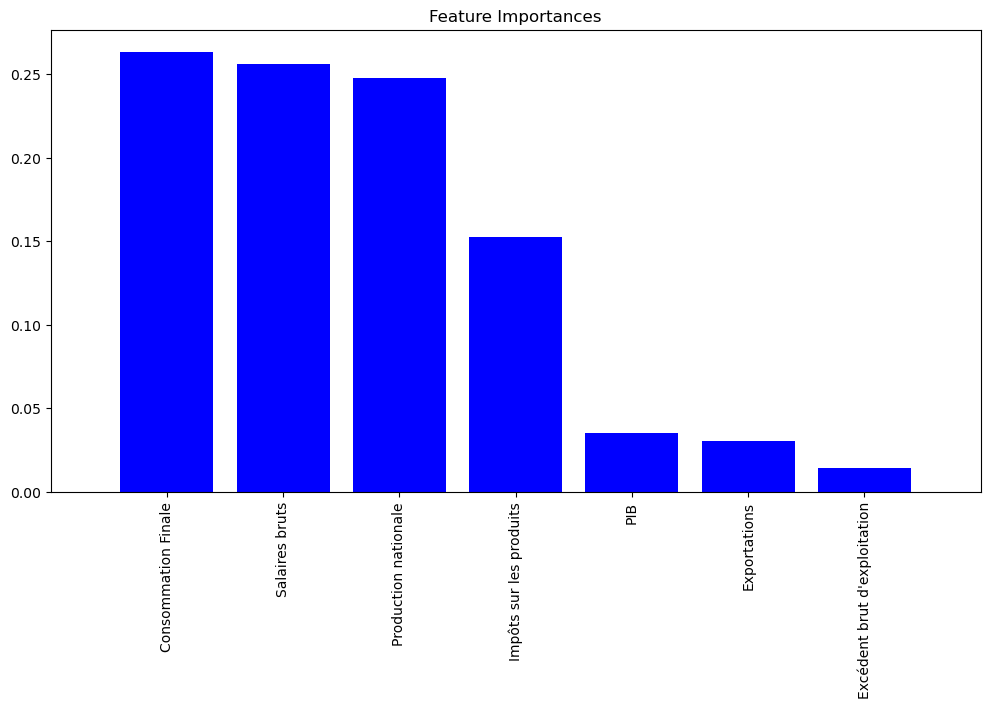

In [13]:
# Now that we have the best parameters for the RandomForest model, let's investigate feature importance.
feature_importances = rf_model.feature_importances_

# Get the feature names
feature_names = X.columns.tolist()

# Create a DataFrame to hold feature importances
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Output the feature importances
print('Feature importances from the RandomForest model:')
importances_df.head(8)

# Plot the feature importances
import matplotlib.pyplot as plt
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()